# Training of the _isMuon_ model 

In this notebook we setup the training for the GlobalPID model for particles that pass the isMuon criterion, based on Generative Adversarial Networks (GAN).

This notebook is part of a pipeline and requires the data preprocessed with the notebook [isMuon-preprocessing.ipynb](./isMuon-preprocessing.ipynb).

In [1]:
import os
from IPython.display import Markdown

LOCAL = os.environ.get("LOCAL", "yes").lower() in ['y', 'yes', 'true', '1']
TEST = os.environ.get("TEST", "yes").lower() in ['y', 'yes', 'true', '1']
SAMPLE = os.environ.get("SAMPLE", "2016MU")
PARTICLE = os.environ.get("PARTICLE", "pion").lower()

Markdown(f"""
 * LOCAL: `{LOCAL}`
 * SAMPLE: `{SAMPLE}`
 * TEST: `{TEST}`
 * PARTICLE: `{PARTICLE}`
""")


 * LOCAL: `True`
 * SAMPLE: `2016MU`
 * TEST: `True`
 * PARTICLE: `pion`


## Enviornment setup and libraries

In this notebooks we will use the standard software stack for TensorFlow machine learning applications.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from os import environ

## Remove annoying warnings 
environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf

To ensure a GPU is found and properly loaded in the notebook kernel to the benefit of TensorFlow, the output of the following block should be similar to `'/device:GPU:0'`.
If a GPU is not found, the string will be empty.

In [3]:
tf.test.gpu_device_name()

'/device:GPU:0'

## Load datasets

Preprocessed datasets were stored in *Apache feather* format and can be reloaded with our custom `FeatherReader` designed to stream the datasets into TensorFlow or Dask format.

We are loading in particular:
 * the **training** dataset to train the network
 * the **validation** dataset to evaluate the network performance at each epoch and identify overtraining effects

In [4]:
DATA_PATH = os.environ.get("DATA_PATH", "/tmp/lb-pidsim-train/data")

In [5]:
from feather_io import FeatherReader    

MAX_FILES = int(os.environ.get("MAX_FILES", "1000"))

reader_train = FeatherReader(environ.get("ISMUON_TRAIN_DATA", f"{DATA_PATH}/isMuon-{PARTICLE}-{SAMPLE}-train"), max_files=MAX_FILES)
ds_train = reader_train.as_tf_dataset()

reader_val = FeatherReader(environ.get("ISMUON_VAL_DATA", f"{DATA_PATH}/isMuon-{PARTICLE}-{SAMPLE}-validation"), max_files=MAX_FILES)
ds_val = reader_val.as_tf_dataset()

We load a small batch of data to identify the shape of features and labels, and automate the definition of the neural network architecture.

In [6]:
x_vars = reader_train.features
y_vars = reader_train.labels

x_vars, y_vars

(['p_GeV', 'eta', 'nTracks_f', 'charge'], ['isMuon'])

In [7]:
X, y = next(iter(ds_train.batch(500_000)))
X.shape, y.shape

(TensorShape([500000, 4]), TensorShape([500000, 1]))

## Model definition

TBA

In [8]:
from training_utils import create_models

_, _, model = create_models(
    'isMuon', 
    PARTICLE, 
    output_dim=y.shape[1], 
    model_filename=os.environ.get("MODEL_YAML_FILE"),
    kwargs_referee=dict(
        mlp_hidden_kernel_regularizer=tf.keras.regularizers.L2(1e-4),
    )
)

### Model architecture

In [9]:
if model is not None:
    model(X[:256])
    model.summary()

Model: "referee_seq"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_0 (Dense)                 │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_0 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_out (Dense)               │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 149,377 (583.50 KB)

 Trainable params: 149,377 (583.50 KB)

 Non-trainable params: 0 (0.00 B)

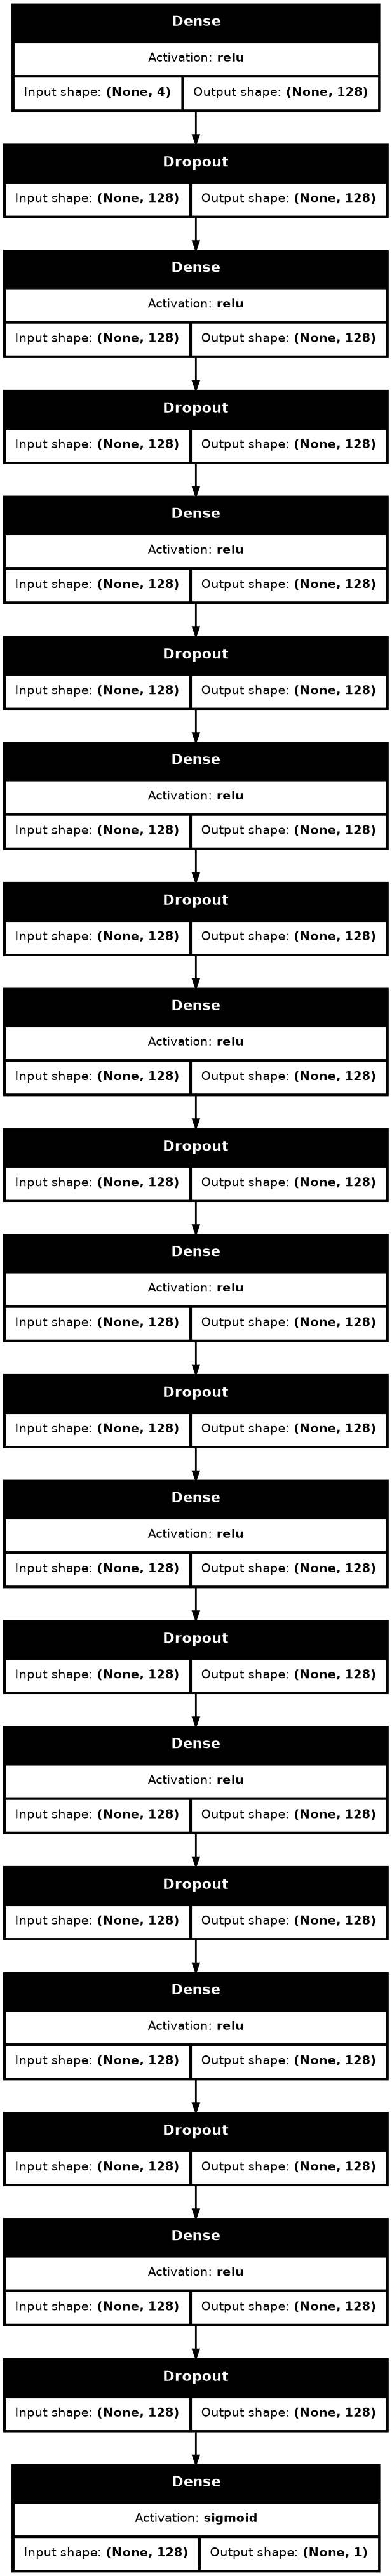

In [10]:
display(
    tf.keras.utils.plot_model(
        model.plain_keras,
        show_shapes=True,
        show_layer_names=False,
        show_layer_activations=True,
        rankdir="TB",
        dpi=100,
    )
)


### Training setup

TBA

The rest of the training procedure is rather standard:
 * loss function: [binary cross-entropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy)
 * optimizer: [RMSprop](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/experimental/RMSprop) or [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam)

In [11]:
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

To speed up convergence, we split the training procedure in two steps:
* First, we start with a high learning rate that is exponentially decreased by using a custom [LearningRateScheduler](https://keras.io/api/callbacks/learning_rate_scheduler), and with a binary cross-entropy loss with `label_smoothing` set to 0.05.
* Then, we operate some fine tuning by fixing the learning rate to the value reached by the scheduler, and by removing the `label_smoothing`.

In [12]:
from training_utils import TimeLimitCallback
from pidgan.callbacks.schedulers import LearnRateExpDecay

TRAINING_TIME_LIMIT_SECONDS = int(environ.get("TRAINING_TIME_LIMIT_SECONDS", "7200"))
num_epochs = int(environ.get("MAX_EPOCHS", "1000"))
batch_size = 20_000
if TEST: num_epochs = 3

data_train = ds_train.repeat().batch(batch_size, drop_remainder=True).prefetch(tf.data.AUTOTUNE)
data_val = next(iter(ds_val.batch(batch_size)))

for pretraining in True, False:
    model.compile(
        loss=BinaryCrossentropy(label_smoothing=0.05 if pretraining else 0),
        metrics=[tf.keras.metrics.AUC(name="auc")],
        optimizer=Adam(0.05),
    )
        
    callbacks = []  # [lr_sched, early_stop]
    
    lr_sched = LearnRateExpDecay(
        model.optimizer,
        decay_rate=0.1,
        decay_steps=50_000,
        verbose=True,
    )
    callbacks.append(lr_sched)
        
    callbacks.append(TimeLimitCallback(TRAINING_TIME_LIMIT_SECONDS))
    
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_auc', 
        mode='max',
        start_from_epoch=100,
        patience=100,
    )
    if pretraining:
        callbacks.append(early_stopping)

    
    train_history = model.fit(
        data_train, 
        epochs=num_epochs, 
        validation_data=data_val, 
        callbacks=callbacks, 
        verbose=2,
        steps_per_epoch=150
    )
    
    if pretraining: 
        pretrain_history = train_history



Epoch 1/3


I0000 00:00:1755527652.464516  213199 service.cc:145] XLA service 0x7fc014006750 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1755527652.464569  213199 service.cc:153]   StreamExecutor device (0): NVIDIA A100 80GB PCIe MIG 1g.10gb, Compute Capability 8.0
I0000 00:00:1755527655.386766  213427 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_609', 48 bytes spill stores, 48 bytes spill loads

I0000 00:00:1755527655.427294  213433 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_609', 16 bytes spill stores, 16 bytes spill loads

I0000 00:00:1755527655.543237  213426 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1010', 204 bytes spill stores, 204 bytes spill loads

I0000 00:00:1755527655.691999  213431 asm_compiler.cc:369] ptxas warning : Registers are spilled to local me

150/150 - 14s - 94ms/step - auc: 0.6709 - loss: 1.2719 - val_auc: 0.7506 - val_loss: 0.4019 - lr: 0.0497
Epoch 2/3
150/150 - 3s - 21ms/step - auc: 0.7472 - loss: 0.3840 - val_auc: 0.7540 - val_loss: 0.3604 - lr: 0.0493
Epoch 3/3
150/150 - 3s - 23ms/step - auc: 0.7499 - loss: 0.3498 - val_auc: 0.7493 - val_loss: 0.3312 - lr: 0.0490
Epoch 1/3


I0000 00:00:1755527675.745815  213197 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_add_reduce_subtract_fusion_3', 2436 bytes spill stores, 4124 bytes spill loads
ptxas warning : Registers are spilled to local memory in function '__cuda_sm3x_div_rn_noftz_f32_slowpath', 44 bytes spill stores, 44 bytes spill loads



150/150 - 10s - 65ms/step - auc: 0.4995 - loss: 0.1411 - val_auc: 0.5000 - val_loss: 0.1115 - lr: 0.0497
Epoch 2/3
150/150 - 4s - 24ms/step - auc: 0.4994 - loss: 0.1140 - val_auc: 0.5000 - val_loss: 0.1052 - lr: 0.0493
Epoch 3/3
150/150 - 4s - 24ms/step - auc: 0.4994 - loss: 0.1111 - val_auc: 0.5000 - val_loss: 0.1039 - lr: 0.0490


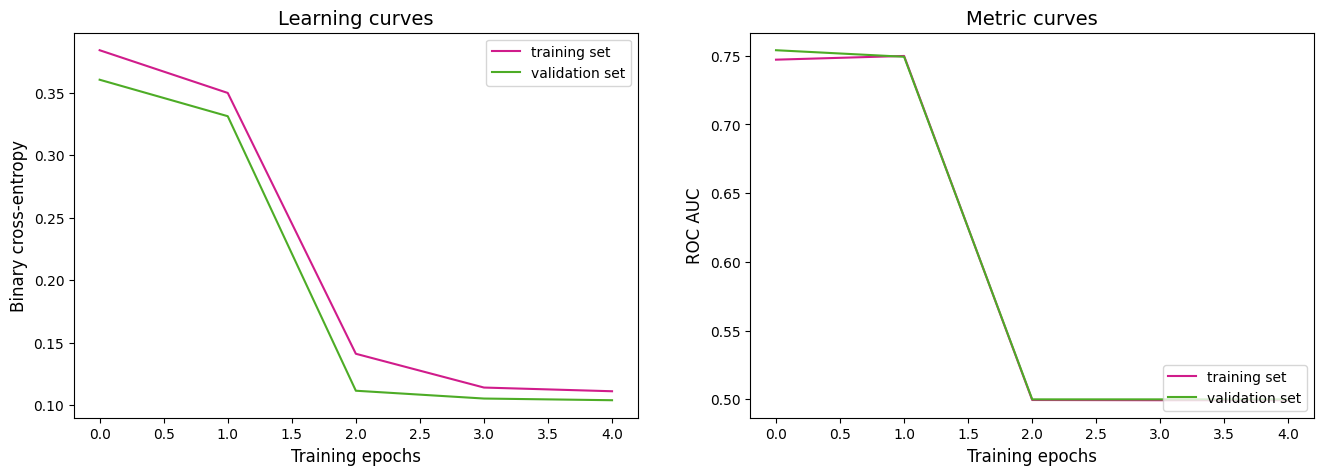

In [13]:
plt.figure(figsize=(16, 5), dpi=100)

plt.subplot(1, 2, 1)
plt.title("Learning curves", fontsize=14)
plt.xlabel("Training epochs", fontsize=12)
plt.ylabel("Binary cross-entropy", fontsize=12)
plt.plot(pretrain_history.history["loss"][1:] + train_history.history["loss"], lw=1.5, color="#d01c8b", label="training set")
plt.plot(pretrain_history.history["val_loss"][1:] + train_history.history["val_loss"], lw=1.5, color="#4dac26", label="validation set")
plt.legend(loc="upper right", fontsize=10)

plt.subplot(1, 2, 2)
plt.title("Metric curves", fontsize=14)
plt.xlabel("Training epochs", fontsize=12)
plt.ylabel("ROC AUC", fontsize=12)
plt.plot(pretrain_history.history["auc"][1:] + train_history.history["auc"], lw=1.5, color="#d01c8b", label="training set")
plt.plot(pretrain_history.history["val_auc"][1:] + train_history.history["val_auc"], lw=1.5, color="#4dac26", label="validation set")
plt.legend(loc="lower right", fontsize=10)

plt.show()

In [14]:
def history_path():
    ret = os.environ.get(
        f"HISTORY_CSV",
        f"/tmp/history/isMuon-{PARTICLE}/training_history.csv"
    )
    os.makedirs(os.path.dirname(ret), exist_ok=True)
    return ret

train_history = train_history.history.copy()
pd.DataFrame(train_history).to_csv(history_path())

## A first, rough validation

TBA

In [15]:
reader_test = FeatherReader(environ.get("ISMUON_TEST_DATA", f"{DATA_PATH}/isMuon-{PARTICLE}-{SAMPLE}-test"), max_files=50)
ds_test = reader_test.as_tf_dataset()

In [ ]:
X_test, y_test = next(iter(ds_test.batch(20_000_000).as_numpy_iterator()))
preds = model.predict(X_test, batch_size=50_000)

I0000 00:00:1755527689.235265  214109 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 48 bytes spill stores, 48 bytes spill loads

I0000 00:00:1755527689.432728  214110 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_32', 16 bytes spill stores, 16 bytes spill loads



 1/12 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step

In [ ]:
bins = np.linspace(0, 1, 11)
plt.hist(y_test, bins=bins, label="Simulation")
plt.hist(preds, bins=bins, histtype='step', linewidth=2, label="Predictions")
plt.yscale("log")
plt.ylim(1, None)
plt.legend()
plt.show()


In [ ]:
prep_p = X_test[:, 0]
bins = np.linspace(-5, 5, 101)

denominator, _ = np.histogram(prep_p, bins=bins)
true_numerator, _ = np.histogram(prep_p, bins=bins, weights=y_test.flatten())
predicted_numerator, _ = np.histogram(prep_p, bins=bins, weights=preds.flatten())

plt.xlabel("Preprocessed $p$ [GeV/$c$]")

plt.hist((bins[1:] + bins[:-1])/2, bins=bins, weights=denominator, label="Generated pions", histtype='step')
plt.fill_between(
    (bins[1:] + bins[:-1])/2, np.zeros(len(true_numerator)), true_numerator,
    label="isMuon passed (sim)",
    color='#88ee88'
)
plt.hist((bins[1:] + bins[:-1])/2, bins=bins, weights=predicted_numerator, label="isMuon passed (model)", histtype='step', linewidth=2)

plt.legend(loc="upper left", fontsize=10)
plt.yscale("log")

plt.show()

In [ ]:
import pickle

def preprocessing_file(var, particle=PARTICLE, model="isMuon"):
    if var not in "XY":
        raise ValueError(f"Unexpected var={var}. Should be X or Y.")
        
    model = model.upper().replace("-", "_")
    default = f"/tmp/lb-pidsim-train/models/isMuon_{particle}_models/t{var}_{SAMPLE}.pkl"
    return os.environ.get(f"{model}_PREPROCESSING_{particle.upper()}_{var}", default)

   
with open(preprocessing_file('X'), "rb") as file:
    X_scaler = pickle.load(file)

    

In [ ]:
from pidgan.utils.preprocessing import invertColumnTransformer
print (X_scaler)
    
X_post = invertColumnTransformer(X_scaler, X_test)

## Data and model export

To simplify the preparation of LHCb figures and freeze the results obtained, the output of the trained model is exported and NumPy file and then uploaded to GitLab.

In [ ]:
from pidgan.utils.preprocessing import invertColumnTransformer

default_output_dataset = f"/tmp/Muon-{PARTICLE}-results.npz"

X_post = invertColumnTransformer(X_scaler, X_test)

np.savez_compressed(
    os.environ.get("OUTPUT_VALIDATION_DATASET", default_output_dataset),
    feat_vars=reader_test.features,
    label_vars=reader_test.labels,
    results=np.c_[X_post, y_test, preds][:5_000_000],
)

Finally, we export the Keras model to the same folder where the preprocessing step was stored.

In [ ]:
import os
default_output_model = "/tmp/models/isMuon/model.keras"
output_model = os.environ.get('OUTPUT_MODEL', default_output_model)
base_dir = os.path.dirname(output_model)
os.makedirs(base_dir, exist_ok=True)
model.plain_keras.save(output_model)